In [10]:
%load_ext autoreload
%autoreload 2

import os
import sys

sys.path.append('/'.join(os.getcwd().split('/')[:-2]))

from src.code.models.RidgeModel import RidgeModel
from src.code.models.LassoModel import LassoModel
from src.code.models.RandomForestModel import RandomForestModel
from src.code.validation.ModelValidation import ModelValidation

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv('./Preprocessed_data.csv', sep=';')
df.head()

,date,target_dollar_price,ACF - Crystal Sugar Futures,AFS - RANDE OF SOUTH AFRICA (TYPE A),ARB - Argentinian peso,ARS - Argentinian peso,AUD - Australian dollar,AUS - AUSTRALIAN DOLLAR (TYPE B),B20 - Global 2020,B3SAO - B3SA3 Future Contract,...,USIMA - USIM5 Future Contract,VALEO - VALE3 Future Contract,VVARO - VVAR3 Future Contract,WDL - US Dollar futures Mini,WDO - Dollar Mini - WDO,WEU - MINI EURO,WIN - Ibovespa Mini,WSP - S&P 500,WTI - Oil Mini,ZAR - SOUTH AFRICAN RAND
0,01/01/2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01/02/2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01/03/2011,1.6501,NaN,NaN,NaN,NaN,1696.178433,NaN,NaN,NaN,...,NaN,NaN,NaN,1663.0800,NaN,NaN,70682.0,NaN,NaN,NaN
3,01/04/2011,1.6616,NaN,NaN,NaN,NaN,1675.237500,NaN,NaN,NaN,...,NaN,NaN,NaN,1677.6985,NaN,NaN,71090.0,NaN,NaN,NaN
4,01/05/2011,1.6760,NaN,NaN,NaN,NaN,1682.144000,NaN,NaN,NaN,...,NaN,NaN,NaN,1688.7720,NaN,NaN,71774.0,NaN,NaN,NaN


In [13]:
pd.options.display.max_columns = 84
pd.options.display.max_rows = 42

In [14]:
corr = df.corr().fillna(0)
corr

,target_dollar_price,ACF - Crystal Sugar Futures,AFS - RANDE OF SOUTH AFRICA (TYPE A),ARB - Argentinian peso,ARS - Argentinian peso,AUD - Australian dollar,AUS - AUSTRALIAN DOLLAR (TYPE B),B20 - Global 2020,B3SAO - B3SA3 Future Contract,B40 - Global 2040,BGI - Live cattle,BRI - IBrX-50,BSE - BVMF SENSEX 30 Index Future Contract,CAD - Canadian dollar,CAN - CANADIAN DOLLAR (TYPE A),CCM - Cash- Settled Corn Futures,CCROO - CCRO3 Future Contract,CHF - SWISS FRANC,CHL - CHILEAN PESO (TYPE A),CIELO - CIEL3 Future Contract,CLP - CHILEAN PESO,CMIGP - CMIG4 Future Contract,CNH - Chinese Yuan (Type A),CNY - YUAN,COP - Milho base de preço Cascavel,CPG - Milho base de preço Paranaguá,CRV - Corn Price Basis – Rio Verde,CTM - Milho base de preço Triângulo Mineiro,DAP - ID x IPCA spread,DCO - OC1 x US Dollar Spread Futures,DDI - ID x US Dollar spread,DI1 - 1-day Interbank Deposits,DOL - US Dollar,ETH - Hydrous Ethanol,ETN - Anhydrous Ethanol,EUP - EURO (TYPE B),EUR - Euro,FRC - FRA on ID x US Dollar spread,FRO - FRA on OC1 x U.S. Dollar Spread,GBP - POUND STERLING,GBR - POUND STERLING (TYPE B),HSI - BVMF HANG SENG Futures Contracts,HYPEO - HYPE3 Future Contract,IAP - IPCA,ICF - 4/5 Arabica Coffee,IGM - IGP-M,IMV - Merval Future Index Contract,IND - Ibovespa,INK - Nikkei Future Index Contract,ISP - S&P 500,JAP - JAPANESE YEN (TYPE A),JPY - YEN,JSE - BVMF FTSE/JSE TOP 40 Index Future Contract,KFE - 6/7 Arabica Coffee,KROTO - KROT3 Future Contract,MEX - MEXICAN PESO (TYPE A),MIX - BVMF MICEX Index Future Contract,MXN - PESO,NOK - NORWEGIAN CROWN (TYPE A),NZD - NEW ZEALAND DOLLAR,NZL - NEW ZEALAND DOLLAR (TYPE B),OC1 - OC1 Futures Contract,OZ1 - Gold 250g.,PCARP - PCAR4 Future Contract,PETRP - PETR4 Future Contract,PSSAO - PSSA3 Future Contract,RUB - RUSSIAN RUBLE (TYPE A),SEK - SWEDISH KRONA (TYPE A),SFI - Cash-Settled Soybean,SJC - Soy Financial Cross Listing,SWI - SWISS FRANC (TYPE A),T10 - US T-Note,TRY - TURKISH LIRA,TUQ - TURKISH LIRA (TYPE A),USIMA - USIM5 Future Contract,VALEO - VALE3 Future Contract,VVARO - VVAR3 Future Contract,WDL - US Dollar futures Mini,WDO - Dollar Mini - WDO,WEU - MINI EURO,WIN - Ibovespa Mini,WSP - S&P 500,WTI - Oil Mini,ZAR - SOUTH AFRICAN RAND
target_dollar_price,1.000000,0.598689,0.902997,-0.414873,0.728702,0.973780,-0.162136,0.502865,0.633343,-0.911934,0.930725,0.634806,-0.265321,0.984245,0.429305,0.829733,-0.304714,0.991120,0.780644,-0.882080,0.957161,-0.867105,0.172045,0.987462,0.387171,0.709306,0.079006,0.175684,-0.080908,-0.129557,0.548454,0.539333,0.993124,0.819833,0.278080,0.262332,0.965316,-0.283371,-0.596861,0.964685,-0.131149,-0.748037,0.064531,0.716989,-0.760150,0.888834,0.209952,0.601191,-0.240178,0.817618,-0.588702,0.954532,-0.159513,-0.904156,-0.192198,0.848090,0.397516,0.882072,0.683165,0.979909,-0.388384,-0.490240,0.956748,-0.656881,-0.746499,-0.496388,0.852132,-0.185109,-0.834004,-0.727186,-0.785122,0.252452,-0.478330,0.909280,-0.326195,0.397093,0.706440,0.995092,0.996419,0.982306,0.614744,0.426982,-0.697087,0.868174
ACF - Crystal Sugar Futures,0.598689,1.000000,0.000000,0.000000,0.000000,0.412737,0.000000,-0.155609,0.000000,-0.851106,0.745010,0.439973,0.000000,0.381259,0.000000,0.569418,0.000000,0.547854,0.000000,0.000000,0.347226,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.624458,-1.000000,-0.068895,0.033651,0.531822,0.867932,0.000000,0.000000,0.220532,0.053010,0.000000,0.229962,0.000000,0.000000,0.000000,0.932139,0.311801,0.831638,0.000000,0.265928,0.000000,0.879758,0.000000,0.702541,0.000000,0.817079,0.000000,0.000000,0.000000,-0.034080,0.000000,0.669883,0.000000,0.501568,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.977944,-0.711881,0.000000,-0.026511,-0.589703,0.000000,0.000000,0.000000,0.000000,0.000000,0.564713,1.000000,0.266806,0.000000,-0.255891,-0.093820
AFS - RANDE OF SOUTH AFRICA (TYPE A),0.902997,0.000000,1.000000,-0.341990,0.338705,0.774249,-0.430751,0.000000,0.464520,0.000000,0.563947,-0.440166,0.000000,0.844764,0.662582,0.512420,-0.309552,0.865

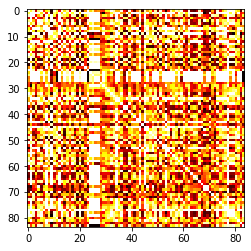

In [15]:
plt.imshow(df.corr(),cmap='hot',interpolation='nearest')

In [16]:
corr.abs()

,target_dollar_price,ACF - Crystal Sugar Futures,AFS - RANDE OF SOUTH AFRICA (TYPE A),ARB - Argentinian peso,ARS - Argentinian peso,AUD - Australian dollar,AUS - AUSTRALIAN DOLLAR (TYPE B),B20 - Global 2020,B3SAO - B3SA3 Future Contract,B40 - Global 2040,BGI - Live cattle,BRI - IBrX-50,BSE - BVMF SENSEX 30 Index Future Contract,CAD - Canadian dollar,CAN - CANADIAN DOLLAR (TYPE A),CCM - Cash- Settled Corn Futures,CCROO - CCRO3 Future Contract,CHF - SWISS FRANC,CHL - CHILEAN PESO (TYPE A),CIELO - CIEL3 Future Contract,CLP - CHILEAN PESO,CMIGP - CMIG4 Future Contract,CNH - Chinese Yuan (Type A),CNY - YUAN,COP - Milho base de preço Cascavel,CPG - Milho base de preço Paranaguá,CRV - Corn Price Basis – Rio Verde,CTM - Milho base de preço Triângulo Mineiro,DAP - ID x IPCA spread,DCO - OC1 x US Dollar Spread Futures,DDI - ID x US Dollar spread,DI1 - 1-day Interbank Deposits,DOL - US Dollar,ETH - Hydrous Ethanol,ETN - Anhydrous Ethanol,EUP - EURO (TYPE B),EUR - Euro,FRC - FRA on ID x US Dollar spread,FRO - FRA on OC1 x U.S. Dollar Spread,GBP - POUND STERLING,GBR - POUND STERLING (TYPE B),HSI - BVMF HANG SENG Futures Contracts,HYPEO - HYPE3 Future Contract,IAP - IPCA,ICF - 4/5 Arabica Coffee,IGM - IGP-M,IMV - Merval Future Index Contract,IND - Ibovespa,INK - Nikkei Future Index Contract,ISP - S&P 500,JAP - JAPANESE YEN (TYPE A),JPY - YEN,JSE - BVMF FTSE/JSE TOP 40 Index Future Contract,KFE - 6/7 Arabica Coffee,KROTO - KROT3 Future Contract,MEX - MEXICAN PESO (TYPE A),MIX - BVMF MICEX Index Future Contract,MXN - PESO,NOK - NORWEGIAN CROWN (TYPE A),NZD - NEW ZEALAND DOLLAR,NZL - NEW ZEALAND DOLLAR (TYPE B),OC1 - OC1 Futures Contract,OZ1 - Gold 250g.,PCARP - PCAR4 Future Contract,PETRP - PETR4 Future Contract,PSSAO - PSSA3 Future Contract,RUB - RUSSIAN RUBLE (TYPE A),SEK - SWEDISH KRONA (TYPE A),SFI - Cash-Settled Soybean,SJC - Soy Financial Cross Listing,SWI - SWISS FRANC (TYPE A),T10 - US T-Note,TRY - TURKISH LIRA,TUQ - TURKISH LIRA (TYPE A),USIMA - USIM5 Future Contract,VALEO - VALE3 Future Contract,VVARO - VVAR3 Future Contract,WDL - US Dollar futures Mini,WDO - Dollar Mini - WDO,WEU - MINI EURO,WIN - Ibovespa Mini,WSP - S&P 500,WTI - Oil Mini,ZAR - SOUTH AFRICAN RAND
target_dollar_price,1.000000,0.598689,0.902997,0.414873,0.728702,0.973780,0.162136,0.502865,0.633343,0.911934,0.930725,0.634806,0.265321,0.984245,0.429305,0.829733,0.304714,0.991120,0.780644,0.882080,0.957161,0.867105,0.172045,0.987462,0.387171,0.709306,0.079006,0.175684,0.080908,0.129557,0.548454,0.539333,0.993124,0.819833,0.278080,0.262332,0.965316,0.283371,0.596861,0.964685,0.131149,0.748037,0.064531,0.716989,0.760150,0.888834,0.209952,0.601191,0.240178,0.817618,0.588702,0.954532,0.159513,0.904156,0.192198,0.848090,0.397516,0.882072,0.683165,0.979909,0.388384,0.490240,0.956748,0.656881,0.746499,0.496388,0.852132,0.185109,0.834004,0.727186,0.785122,0.252452,0.478330,0.909280,0.326195,0.397093,0.706440,0.995092,0.996419,0.982306,0.614744,0.426982,0.697087,0.868174
ACF - Crystal Sugar Futures,0.598689,1.000000,0.000000,0.000000,0.000000,0.412737,0.000000,0.155609,0.000000,0.851106,0.745010,0.439973,0.000000,0.381259,0.000000,0.569418,0.000000,0.547854,0.000000,0.000000,0.347226,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.624458,1.000000,0.068895,0.033651,0.531822,0.867932,0.000000,0.000000,0.220532,0.053010,0.000000,0.229962,0.000000,0.000000,0.000000,0.932139,0.311801,0.831638,0.000000,0.265928,0.000000,0.879758,0.000000,0.702541,0.000000,0.817079,0.000000,0.000000,0.000000,0.034080,0.000000,0.669883,0.000000,0.501568,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.977944,0.711881,0.000000,0.026511,0.589703,0.000000,0.000000,0.000000,0.000000,0.000000,0.564713,1.000000,0.266806,0.000000,0.255891,0.093820
AFS - RANDE OF SOUTH AFRICA (TYPE A),0.902997,0.000000,1.000000,0.341990,0.338705,0.774249,0.430751,0.000000,0.464520,0.000000,0.563947,0.440166,0.000000,0.844764,0.662582,0.512420,0.309552,0.865096,0.819100,0.831808,0.726388,0.873387,0.41846

In [17]:
corr.shape

(84, 84)

In [18]:
def get_high_correlation_columns(df, threshold):
    rows, cols = df.shape
    
    flagged_positions = np.zeros((rows, cols))
    
    unique_flags = []
    
    correlated_features = set()
    correlation_matrix = df.copy()

    for i in range(len(correlation_matrix .columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > threshold:
                colname = correlation_matrix.columns[i]
                correlated_features.add(colname)
    
    return correlated_features
    
    
def remove_df_columns(df, columns):
    return df.drop(labels=columns, axis=1)

def fill_missing_values(df):
    '''
        The strategy for filling missing values here is the following,
        first we try to fill missing values with the past missing value we have available, when
        we don't have that, we fill the missing values with the next forward value available 
    '''
    
    return df.fillna(method='bfill', axis=0).fillna(method='ffill', axis=0)
    
def add_rolling_window_features(df, window_sizes):
    
    result = df.copy()
    
    for window_size in window_sizes: 
        
        rolling_windows = df.copy().drop('target_dollar_price', axis=1)
        rolling_windows.iloc[: 2:] = rolling_windows.iloc[:, 2:].rolling(window=window_size).mean()
        result = result.merge(rolling_windows, on=['date'], suffixes=['', f'_window_length_{window_size}'])
    
    return result

def sort_df_columns(df):
    columns = sorted(df.columns)[-2:]
    columns.extend(sorted(df.columns)[:-2])
    df.columns = columns
    
def train_test_split(df, train_split_size):
    total_rows, total_columns = df.shape
    
    train_size = round(total_rows * train_split_size)
    test_size = total_rows - train_size
    
    train_df = df.iloc[:train_size, :]
    test_df = df.iloc[train_size:, :]
    
    return train_df, test_df

def apply_min_max_scaling(df, scaler=None):
    if scaler == None:
        scaler = MinMaxScaler()
        scaler.fit(df.iloc[:, 1:])
    
    scaled_df = df.copy()
    
    scaled_df.iloc[:, 1:] = scaler.transform(df.iloc[:, 1:])
    
    return scaled_df, scaler

correlation_threshold = 0.90

filtered_df = remove_df_columns(
    df,
    get_high_correlation_columns(df.iloc[:, 1:].corr().abs(), correlation_threshold)
)

back_filled_df = fill_missing_values(filtered_df)
shifted_df = back_filled_df.set_index(['date', 'target_dollar_price']).shift(1).dropna().reset_index()

windows_df = add_rolling_window_features(shifted_df, window_sizes=[7, 21])

train_df, test_df = train_test_split(windows_df, train_split_size=0.8)

scaled_train_df, scaler = apply_min_max_scaling(train_df)
scaled_test_df, scaler = apply_min_max_scaling(test_df, scaler)


In [19]:
scaled_train_df

,date,target_dollar_price,ACF - Crystal Sugar Futures,ARB - Argentinian peso,ARS - Argentinian peso,AUS - AUSTRALIAN DOLLAR (TYPE B),B20 - Global 2020,B3SAO - B3SA3 Future Contract,BRI - IBrX-50,BSE - BVMF SENSEX 30 Index Future Contract,CAN - CANADIAN DOLLAR (TYPE A),CCM - Cash- Settled Corn Futures,CCROO - CCRO3 Future Contract,CHL - CHILEAN PESO (TYPE A),CIELO - CIEL3 Future Contract,CMIGP - CMIG4 Future Contract,CNH - Chinese Yuan (Type A),DAP - ID x IPCA spread,DDI - ID x US Dollar spread,DI1 - 1-day Interbank Deposits,ETH - Hydrous Ethanol,EUP - EURO (TYPE B),FRC - FRA on ID x US Dollar spread,GBR - POUND STERLING (TYPE B),HSI - BVMF HANG SENG Futures Contracts,HYPEO - HYPE3 Future Contract,ICF - 4/5 Arabica Coffee,JAP - JAPANESE YEN (TYPE A),JSE - BVMF FTSE/JSE TOP 40 Index Future Contract,KROTO - KROT3 Future Contract,MIX - BVMF MICEX Index Future Contract,NOK - NORWEGIAN CROWN (TYPE A),PCARP - PCAR4 Future Contract,PETRP - PETR4 Future Contract,PSSAO - PSSA3 Future Contract,RUB - RUSSIAN RUBLE (TYPE A),SWI - SWISS FRANC (TYPE A),TRY - TURKISH LIRA,USIMA - USIM5 Future Contract,ACF - Crystal Sugar Futures_window_length_7,ARB - Argentinian peso_window_length_7,ARS - Argentinian peso_window_length_7,...,PSSAO - PSSA3 Future Contract_window_length_7,RUB - RUSSIAN RUBLE (TYPE A)_window_length_7,SWI - SWISS FRANC (TYPE A)_window_length_7,TRY - TURKISH LIRA_window_length_7,USIMA - USIM5 Future Contract_window_length_7,ACF - Crystal Sugar Futures_window_length_21,ARB - Argentinian peso_window_length_21,ARS - Argentinian peso_window_length_21,AUS - AUSTRALIAN DOLLAR (TYPE B)_window_length_21,B20 - Global 2020_window_length_21,B3SAO - B3SA3 Future Contract_window_length_21,BRI - IBrX-50_window_length_21,BSE - BVMF SENSEX 30 Index Future Contract_window_length_21,CAN - CANADIAN DOLLAR (TYPE A)_window_length_21,CCM - Cash- Settled Corn Futures_window_length_21,CCROO - CCRO3 Future Contract_window_length_21,CHL - CHILEAN PESO (TYPE A)_window_length_21,CIELO - CIEL3 Future Contract_window_length_21,CMIGP - CMIG4 Future Contract_window_length_21,CNH - Chinese Yuan (Type A)_window_length_21,DAP - ID x IPCA spread_window_length_21,DDI - ID x US Dollar spread_window_length_21,DI1 - 1-day Interbank Deposits_window_length_21,ETH - Hydrous Ethanol_window_length_21,EUP - EURO (TYPE B)_window_length_21,FRC - FRA on ID x US Dollar spread_window_length_21,GBR - POUND STERLING (TYPE B)_window_length_21,HSI - BVMF HANG SENG Futures Contracts_window_length_21,HYPEO - HYPE3 Future Contract_window_length_21,ICF - 4/5 Arabica Coffee_window_length_21,JAP - JAPANESE YEN (TYPE A)_window_length_21,JSE - BVMF FTSE/JSE TOP 40 Index Future Contract_window_length_21,KROTO - KROT3 Future Contract_window_length_21,MIX - BVMF MICEX Index Future Contract_window_length_21,NOK - NORWEGIAN CROWN (TYPE A)_window_length_21,PCARP - PCAR4 Future Contract_window_length_21,PETRP - PETR4 Future Contract_window_length_21,PSSAO - PSSA3 Future Contract_window_length_21,RUB - RUSSIAN RUBLE (TYPE A)_window_length_21,SWI - SWISS FRANC (TYPE A)_window_length_21,TRY - TURKISH LIRA_window_length_21,USIMA - USIM5 Future Contract_window_length_21
0,01/04/2011,0.047895,0.033316,0.0,1.0,1.0,0.207481,1.0,0.303247,0.294788,0.0,0.069295,1.0,1.0,0.0,0.0,0.0,0.337963,0.126894,0.202825,0.028210,1.0,0.700533,1.0,0.891844,0.0,0.638634,0.0,0.664787,0.0,0.111176,1.0,0.0,1.0,0.0,1.0,0.0,0.444381,1.0,0.033316,0.0,1.0,...,0.0,1.0,0.0,0.444381,1.0,0.033316,0.0,1.0,1.0,0.207481,1.0,0.303247,0.294788,0.0,0.069295,1.0,1.0,0.0,0.0,0.0,0.337963,0.126894,0.202825,0.028210,1.0,0.700533,1.0,0.891844,0.0,0.638634,0.0,0.664787,0.0,0.111176,1.0,0.0,1.0,0.0,1.0,0.0,0.444381,1.0
1,01/05/2011,0.053313,0.033316,0.0,1.0,1.0,0.207481,1.0,0.307981,0.294788,0.0,0.060824,1.0,1.0,0.0,0.0,0.0,0.338854,0.177947,0.176316,0.024147,1.0,0.693400,1.0,0.891844,0.0,0.621787,0.0,0.664787,0.0,0.111176,1.0,0.0,1.0,0.0,1.0,0.0,0.444381,1.0,0.033316,0.0,1.0,...,0.0,1.0,0.0,0.444381,1.0,0.033316,0.0,1.0,1.0,0.207481,1.0,0.307981,0.

In [26]:
import warnings
warnings.filterwarnings('ignore')

input_data = pd.concat([scaled_train_df, scaled_test_df])
X = input_data.drop(['date', 'target_dollar_price'], axis=1)
y = input_data[['target_dollar_price']]

model = LassoModel(alpha=1.0)

validation = ModelValidation(
    model=model,
    X=X,
    y=y,
    initial_train_size=0.001,
    scaling_max=scaler.data_max_[0],
    scaling_min=scaler.data_min_[0]
)

y_true, y_pred = validation.validate()

There are N=3606 weeks of test
week=9
partial r2=-0.5863027487088897
mean absolute percentage error MAPE=0.28906292617810714
partial adjusted r2=-1.8553449476760013

week=19
partial r2=0.30470414171126103
mean absolute percentage error MAPE=0.2071136617306213
partial adjusted r2=0.11929191283426399

week=29
partial r2=0.2856264836405201
mean absolute percentage error MAPE=0.20780607860601935
partial adjusted r2=0.17132672102300328

week=39
partial r2=0.39824586864952627
mean absolute percentage error MAPE=0.2060946671036386
partial adjusted r2=0.3294739679237578

week=49
partial r2=0.4471063503219662
mean absolute percentage error MAPE=0.20653995808207037
partial adjusted r2=0.39796024812836317

week=59
partial r2=0.6376051140217941
mean absolute percentage error MAPE=0.21127044380041998
partial adjusted r2=0.6112491223142882

week=69
partial r2=0.6616825243842049
mean absolute percentage error MAPE=0.20870179602390215
partial adjusted r2=0.640862987423233

week=79
partial r2=0.6663917

week=669
partial r2=0.9949443306503898
mean absolute percentage error MAPE=0.37793761482492916
partial adjusted r2=0.9949139206091892

week=679
partial r2=0.9950833317775488
mean absolute percentage error MAPE=0.37643997030256243
partial adjusted r2=0.9950541959658602

week=689
partial r2=0.995262137513065
mean absolute percentage error MAPE=0.3733335905458657
partial adjusted r2=0.9952344711627763

week=699
partial r2=0.9953596140008532
mean absolute percentage error MAPE=0.37538468419219784
partial adjusted r2=0.9953329067433041

week=709
partial r2=0.9954966013997028
mean absolute percentage error MAPE=0.37328901328117275
partial adjusted r2=0.9954710502019706

week=719
partial r2=0.9955835062029635
mean absolute percentage error MAPE=0.37269321269514166
partial adjusted r2=0.9955587985453578

week=729
partial r2=0.9956632972626279
mean absolute percentage error MAPE=0.37010778713661013
partial adjusted r2=0.9956393706268355

week=739
partial r2=0.9957346388527064
mean absolute perc

week=1279
partial r2=0.9974625243271684
mean absolute percentage error MAPE=0.3748291792060214
partial adjusted r2=0.9974545636191752

week=1289
partial r2=0.9974513070686588
mean absolute percentage error MAPE=0.3754233543912336
partial adjusted r2=0.9974433733941643

week=1299
partial r2=0.9974632694478175
mean absolute percentage error MAPE=0.3741134414786992
partial adjusted r2=0.9974554339866525

week=1309
partial r2=0.9974664832824864
mean absolute percentage error MAPE=0.37465010519435343
partial adjusted r2=0.9974587177140036

week=1319
partial r2=0.9974871274320763
mean absolute percentage error MAPE=0.37296824929465966
partial adjusted r2=0.9974794837132386

week=1329
partial r2=0.9974951948841821
mean absolute percentage error MAPE=0.3730930459301741
partial adjusted r2=0.9974876332083608

week=1339
partial r2=0.9975021225934061
mean absolute percentage error MAPE=0.37229664455344474
partial adjusted r2=0.9974946383165324

week=1349
partial r2=0.9974924226733312
mean absolut

week=1889
partial r2=0.9990915953575948
mean absolute percentage error MAPE=0.4534086306491388
partial adjusted r2=0.9990896677084863

week=1899
partial r2=0.9990687794661279
mean absolute percentage error MAPE=0.4570906721989003
partial adjusted r2=0.9990668138291171

week=1909
partial r2=0.9990710237782564
mean absolute percentage error MAPE=0.4577524530470564
partial adjusted r2=0.9990690731720165

week=1919
partial r2=0.9990550714242775
mean absolute percentage error MAPE=0.4607632897662714
partial adjusted r2=0.9990530976831272

week=1929
partial r2=0.9990588308640014
mean absolute percentage error MAPE=0.4614354263796587
partial adjusted r2=0.9990568751878747

week=1939
partial r2=0.9990650525671309
mean absolute percentage error MAPE=0.4616133776523063
partial adjusted r2=0.9990631198592593

week=1949
partial r2=0.9990641186012508
mean absolute percentage error MAPE=0.4627457518787011
partial adjusted r2=0.9990621939094282

week=1959
partial r2=0.9990642730911673
mean absolute p

week=2509
partial r2=0.9987213650054766
mean absolute percentage error MAPE=0.4713231723398931
partial adjusted r2=0.9987193232729504

week=2519
partial r2=0.9987231923113363
mean absolute percentage error MAPE=0.47108459203926795
partial adjusted r2=0.9987211616032828

week=2529
partial r2=0.9987252767716253
mean absolute percentage error MAPE=0.47053602303557523
partial adjusted r2=0.9987232574080952

week=2539
partial r2=0.9987279639790116
mean absolute percentage error MAPE=0.4703258578825893
partial adjusted r2=0.998725956821582

week=2549
partial r2=0.998730215293629
mean absolute percentage error MAPE=0.46966420473058
partial adjusted r2=0.9987282195612811

week=2559
partial r2=0.9987339281088033
mean absolute percentage error MAPE=0.468335328806009
partial adjusted r2=0.9987319460001675

week=2569
partial r2=0.9987363369983895
mean absolute percentage error MAPE=0.46768144468135203
partial adjusted r2=0.9987343663738256

week=2579
partial r2=0.9987344876113903
mean absolute per

week=3119
partial r2=0.9989116953579479
mean absolute percentage error MAPE=0.46765299986194464
partial adjusted r2=0.9989102978559998

week=3129
partial r2=0.9989149622276602
mean absolute percentage error MAPE=0.4674175086825427
partial adjusted r2=0.9989135733793116

week=3139
partial r2=0.9989169238414793
mean absolute percentage error MAPE=0.46760449350538486
partial adjusted r2=0.9989155419261255

week=3149
partial r2=0.9989177754046411
mean absolute percentage error MAPE=0.4683069340000317
partial adjusted r2=0.998916398966364

week=3159
partial r2=0.9989245187456484
mean absolute percentage error MAPE=0.4681450887390802
partial adjusted r2=0.9989231552194938

week=3169
partial r2=0.9989287019443363
mean absolute percentage error MAPE=0.4681023663076547
partial adjusted r2=0.9989273480131443

week=3179
partial r2=0.9989352541740704
mean absolute percentage error MAPE=0.46770163286914723
partial adjusted r2=0.9989339127620062

week=3189
partial r2=0.9989441261557515
mean absolute

In [23]:
print(input_data.shape)
input_data.head()

(3610, 113)


,date,target_dollar_price,ACF - Crystal Sugar Futures,ARB - Argentinian peso,ARS - Argentinian peso,AUS - AUSTRALIAN DOLLAR (TYPE B),B20 - Global 2020,B3SAO - B3SA3 Future Contract,BRI - IBrX-50,BSE - BVMF SENSEX 30 Index Future Contract,CAN - CANADIAN DOLLAR (TYPE A),CCM - Cash- Settled Corn Futures,CCROO - CCRO3 Future Contract,CHL - CHILEAN PESO (TYPE A),CIELO - CIEL3 Future Contract,CMIGP - CMIG4 Future Contract,CNH - Chinese Yuan (Type A),DAP - ID x IPCA spread,DDI - ID x US Dollar spread,DI1 - 1-day Interbank Deposits,ETH - Hydrous Ethanol,EUP - EURO (TYPE B),FRC - FRA on ID x US Dollar spread,GBR - POUND STERLING (TYPE B),HSI - BVMF HANG SENG Futures Contracts,HYPEO - HYPE3 Future Contract,ICF - 4/5 Arabica Coffee,JAP - JAPANESE YEN (TYPE A),JSE - BVMF FTSE/JSE TOP 40 Index Future Contract,KROTO - KROT3 Future Contract,MIX - BVMF MICEX Index Future Contract,NOK - NORWEGIAN CROWN (TYPE A),PCARP - PCAR4 Future Contract,PETRP - PETR4 Future Contract,PSSAO - PSSA3 Future Contract,RUB - RUSSIAN RUBLE (TYPE A),SWI - SWISS FRANC (TYPE A),TRY - TURKISH LIRA,USIMA - USIM5 Future Contract,ACF - Crystal Sugar Futures_window_length_7,ARB - Argentinian peso_window_length_7,ARS - Argentinian peso_window_length_7,...,PSSAO - PSSA3 Future Contract_window_length_7,RUB - RUSSIAN RUBLE (TYPE A)_window_length_7,SWI - SWISS FRANC (TYPE A)_window_length_7,TRY - TURKISH LIRA_window_length_7,USIMA - USIM5 Future Contract_window_length_7,ACF - Crystal Sugar Futures_window_length_21,ARB - Argentinian peso_window_length_21,ARS - Argentinian peso_window_length_21,AUS - AUSTRALIAN DOLLAR (TYPE B)_window_length_21,B20 - Global 2020_window_length_21,B3SAO - B3SA3 Future Contract_window_length_21,BRI - IBrX-50_window_length_21,BSE - BVMF SENSEX 30 Index Future Contract_window_length_21,CAN - CANADIAN DOLLAR (TYPE A)_window_length_21,CCM - Cash- Settled Corn Futures_window_length_21,CCROO - CCRO3 Future Contract_window_length_21,CHL - CHILEAN PESO (TYPE A)_window_length_21,CIELO - CIEL3 Future Contract_window_length_21,CMIGP - CMIG4 Future Contract_window_length_21,CNH - Chinese Yuan (Type A)_window_length_21,DAP - ID x IPCA spread_window_length_21,DDI - ID x US Dollar spread_window_length_21,DI1 - 1-day Interbank Deposits_window_length_21,ETH - Hydrous Ethanol_window_length_21,EUP - EURO (TYPE B)_window_length_21,FRC - FRA on ID x US Dollar spread_window_length_21,GBR - POUND STERLING (TYPE B)_window_length_21,HSI - BVMF HANG SENG Futures Contracts_window_length_21,HYPEO - HYPE3 Future Contract_window_length_21,ICF - 4/5 Arabica Coffee_window_length_21,JAP - JAPANESE YEN (TYPE A)_window_length_21,JSE - BVMF FTSE/JSE TOP 40 Index Future Contract_window_length_21,KROTO - KROT3 Future Contract_window_length_21,MIX - BVMF MICEX Index Future Contract_window_length_21,NOK - NORWEGIAN CROWN (TYPE A)_window_length_21,PCARP - PCAR4 Future Contract_window_length_21,PETRP - PETR4 Future Contract_window_length_21,PSSAO - PSSA3 Future Contract_window_length_21,RUB - RUSSIAN RUBLE (TYPE A)_window_length_21,SWI - SWISS FRANC (TYPE A)_window_length_21,TRY - TURKISH LIRA_window_length_21,USIMA - USIM5 Future Contract_window_length_21
0,01/04/2011,0.047895,0.033316,0.0,1.0,1.0,0.207481,1.0,0.303247,0.294788,0.0,0.069295,1.0,1.0,0.0,0.0,0.0,0.337963,0.126894,0.202825,0.028210,1.0,0.700533,1.0,0.891844,0.0,0.638634,0.0,0.664787,0.0,0.111176,1.0,0.0,1.0,0.0,1.0,0.0,0.444381,1.0,0.033316,0.0,1.0,...,0.0,1.0,0.0,0.444381,1.0,0.033316,0.0,1.0,1.0,0.207481,1.0,0.303247,0.294788,0.0,0.069295,1.0,1.0,0.0,0.0,0.0,0.337963,0.126894,0.202825,0.028210,1.0,0.700533,1.0,0.891844,0.0,0.638634,0.0,0.664787,0.0,0.111176,1.0,0.0,1.0,0.0,1.0,0.0,0.444381,1.0
1,01/05/2011,0.053313,0.033316,0.0,1.0,1.0,0.207481,1.0,0.307981,0.294788,0.0,0.060824,1.0,1.0,0.0,0.0,0.0,0.338854,0.177947,0.176316,0.024147,1.0,0.693400,1.0,0.891844,0.0,0.621787,0.0,0.664787,0.0,0.111176,1.0,0.0,1.0,0.0,1.0,0.0,0.444381,1.0,0.033316,0.0,1.0,...,0.0,1.0,0.0,0.444381,1.0,0.033316,0.0,1.0,1.0,0.207481,1.0,0.307981,0.

In [29]:
import warnings
warnings.filterwarnings('ignore')

input_data = pd.concat([scaled_train_df, scaled_test_df])
X = input_data.drop(['date', 'target_dollar_price'], axis=1)
y = input_data[['target_dollar_price']]

parameters = {
    'n_estimators': 400,
    'max_depth': 15,
#     'min_samples_split': 10,
    'min_samples_leaf': 30,
    'n_jobs': 12,
    'max_features': 20,
}

model = RandomForestModel(**parameters)

validation = ModelValidation(
    model=model,
    X=X,
    y=y,
    initial_train_size=0.8,
    scaling_max=scaler.data_max_[0],
    scaling_min=scaler.data_min_[0],
)

y_true, y_pred = validation.validate()

There are N=722 weeks of test
week=9
partial r2=0.2995451817502094
mean absolute percentage error MAPE=0.5916754912755372
partial adjusted r2=1.0021896816131464

week=19
partial r2=0.16039151191231205
mean absolute percentage error MAPE=0.5050431348536506
partial adjusted r2=1.0055603211131634

week=29
partial r2=0.17490715019163594
mean absolute percentage error MAPE=0.45012472217430544
partial adjusted r2=1.0083692524114873

week=39
partial r2=0.8226168106646716
mean absolute percentage error MAPE=0.42993426025071085
partial adjusted r2=1.0024282009070122

week=49
partial r2=0.9038820884562215
mean absolute percentage error MAPE=0.41511797182774784
partial adjusted r2=1.0016589565571135

week=59
partial r2=0.9114045621203485
mean absolute percentage error MAPE=0.36417095787951326
partial adjusted r2=1.0018476955938138

week=69
partial r2=0.9251937010454769
mean absolute percentage error MAPE=0.37908921143812274
partial adjusted r2=1.0018310161858326

week=79
partial r2=0.917058293592

week=619
partial r2=0.9955064841138576
mean absolute percentage error MAPE=0.5160844192343156
partial adjusted r2=1.001225864404373

week=629
partial r2=0.9956468083503394
mean absolute percentage error MAPE=0.5194193247637018
partial adjusted r2=1.001212110468188

week=639
partial r2=0.995707542773958
mean absolute percentage error MAPE=0.524777412452588
partial adjusted r2=1.0012195998965945

week=649
partial r2=0.9957807320585618
mean absolute percentage error MAPE=0.5261771280676409
partial adjusted r2=1.0012230035256782

week=659
partial r2=0.9958117281871578
mean absolute percentage error MAPE=0.5281434268193245
partial adjusted r2=1.00123825532735

week=669
partial r2=0.9959089966271777
mean absolute percentage error MAPE=0.530125556380018
partial adjusted r2=1.0012333849736

week=679
partial r2=0.9960589434638031
mean absolute percentage error MAPE=0.5292301763381542
partial adjusted r2=1.0012113976405965

week=689
partial r2=0.9962110929612487
mean absolute percentage error MA

In [30]:
import warnings
warnings.filterwarnings('ignore')

input_data = pd.concat([scaled_train_df, scaled_test_df])
X = input_data.drop(['date', 'target_dollar_price'], axis=1)
y = input_data[['target_dollar_price']]

model = RidgeModel(alpha=1.0)

validation = ModelValidation(
    model=model,
    X=X,
    y=y,
    initial_train_size=0.8,
    scaling_max=scaler.data_max_[0],
    scaling_min=scaler.data_min_[0],
)

y_true, y_pred = validation.validate()

There are N=722 weeks of test
week=9
partial r2=-0.9833759965095248
mean absolute percentage error MAPE=0.890160257568319
partial adjusted r2=1.0062002028372996

week=19
partial r2=-0.7888020293324722
mean absolute percentage error MAPE=0.6464306557290765
partial adjusted r2=1.011846371055182

week=29
partial r2=-0.5695491933751515
mean absolute percentage error MAPE=0.54275792550641
partial adjusted r2=1.0159205759383978

week=39
partial r2=0.7110203910170287
mean absolute percentage error MAPE=0.4988153601643023
partial adjusted r2=1.0039558458232136

week=49
partial r2=0.8494643688775407
mean absolute percentage error MAPE=0.4699417044120326
partial adjusted r2=1.002598184545615

week=59
partial r2=0.8622302859386215
mean absolute percentage error MAPE=0.40970253239865184
partial adjusted r2=1.0028732460691485

week=69
partial r2=0.8914802419842223
mean absolute percentage error MAPE=0.41802200704146
partial adjusted r2=1.0026562125942138

week=79
partial r2=0.8854167283299365
mean 

week=639
partial r2=0.9956406412134984
mean absolute percentage error MAPE=0.5289814232453536
partial adjusted r2=1.0012386083879834

week=649
partial r2=0.9957162866787603
mean absolute percentage error MAPE=0.5303163621147535
partial adjusted r2=1.0012416837630569

week=659
partial r2=0.9957492756892365
mean absolute percentage error MAPE=0.5322198500311235
partial adjusted r2=1.0012567193004904

week=669
partial r2=0.9958494278458111
mean absolute percentage error MAPE=0.534141046509427
partial adjusted r2=1.0012513441961028

week=679
partial r2=0.9960021489171667
mean absolute percentage error MAPE=0.53318652817405
partial adjusted r2=1.0012288550861221

week=689
partial r2=0.9961567449990951
mean absolute percentage error MAPE=0.5293782037451382
partial adjusted r2=1.0012041849457132

week=699
partial r2=0.9962913976502229
mean absolute percentage error MAPE=0.5269216432878038
partial adjusted r2=1.001184245336909

week=709
partial r2=0.9963100254695684
mean absolute percentage er

In [18]:
y_true

,target_dollar_price
2888,0.866022
2889,0.866022
2890,0.866022
2891,0.872681
2892,0.876820
...,...
3605,1.433162
3606,1.425486
3607,1.421912
3608,1.444900


In [19]:
y_pred

array([0.44450458, 0.86602205, 0.86602205, 0.86602205, 0.87268144,
       0.87682005, 0.90300613, 0.88622597, 0.89864178, 0.89864178,
       0.89864178, 0.89465367, 0.87215471, 0.88253885, 0.89194477,
       0.88761804, 0.88761804, 0.88761804, 0.89066556, 0.88201211,
       0.88663983, 0.88663983, 0.88460815, 0.88460815, 0.88460815,
       0.89687347, 0.89687347, 0.88592498, 0.87982994, 0.86534482,
       0.86534482, 0.86534482, 0.86534482, 0.86534482, 0.83415478,
       0.82200233, 0.82452312, 0.82452312, 0.82452312, 0.81816472,
       0.80894691, 0.81857858, 0.81933105, 0.81278453, 0.81278453,
       0.81278453, 0.824335  , 0.8287746 , 0.83614884, 0.83660032,
       0.83682607, 0.83682607, 0.83682607, 0.84453892, 0.84043794,
       0.84107754, 0.83814289, 0.8387825 , 0.8387825 , 0.8387825 ,
       0.82546371, 0.82373302, 0.79863802, 0.79807367, 0.80104594,
       0.80104594, 0.80104594, 0.80277663, 0.81331126, 0.82219045,
       0.8279845 , 0.8373528 , 0.8373528 , 0.8373528 , 0.82008

In [26]:
input_data

,date,target_dollar_price,ACF - Crystal Sugar Futures,ARB - Argentinian peso,ARS - Argentinian peso,AUS - AUSTRALIAN DOLLAR (TYPE B),B20 - Global 2020,B3SAO - B3SA3 Future Contract,BRI - IBrX-50,BSE - BVMF SENSEX 30 Index Future Contract,CAN - CANADIAN DOLLAR (TYPE A),CCM - Cash- Settled Corn Futures,CCROO - CCRO3 Future Contract,CHL - CHILEAN PESO (TYPE A),CIELO - CIEL3 Future Contract,CMIGP - CMIG4 Future Contract,CNH - Chinese Yuan (Type A),DAP - ID x IPCA spread,DDI - ID x US Dollar spread,DI1 - 1-day Interbank Deposits,ETH - Hydrous Ethanol,EUP - EURO (TYPE B),FRC - FRA on ID x US Dollar spread,GBR - POUND STERLING (TYPE B),HSI - BVMF HANG SENG Futures Contracts,HYPEO - HYPE3 Future Contract,ICF - 4/5 Arabica Coffee,JAP - JAPANESE YEN (TYPE A),JSE - BVMF FTSE/JSE TOP 40 Index Future Contract,KROTO - KROT3 Future Contract,MIX - BVMF MICEX Index Future Contract,NOK - NORWEGIAN CROWN (TYPE A),PCARP - PCAR4 Future Contract,PETRP - PETR4 Future Contract,PSSAO - PSSA3 Future Contract,RUB - RUSSIAN RUBLE (TYPE A),SWI - SWISS FRANC (TYPE A),TRY - TURKISH LIRA,USIMA - USIM5 Future Contract,ACF - Crystal Sugar Futures_window_length_7,ARB - Argentinian peso_window_length_7,ARS - Argentinian peso_window_length_7,...,PSSAO - PSSA3 Future Contract_window_length_7,RUB - RUSSIAN RUBLE (TYPE A)_window_length_7,SWI - SWISS FRANC (TYPE A)_window_length_7,TRY - TURKISH LIRA_window_length_7,USIMA - USIM5 Future Contract_window_length_7,ACF - Crystal Sugar Futures_window_length_21,ARB - Argentinian peso_window_length_21,ARS - Argentinian peso_window_length_21,AUS - AUSTRALIAN DOLLAR (TYPE B)_window_length_21,B20 - Global 2020_window_length_21,B3SAO - B3SA3 Future Contract_window_length_21,BRI - IBrX-50_window_length_21,BSE - BVMF SENSEX 30 Index Future Contract_window_length_21,CAN - CANADIAN DOLLAR (TYPE A)_window_length_21,CCM - Cash- Settled Corn Futures_window_length_21,CCROO - CCRO3 Future Contract_window_length_21,CHL - CHILEAN PESO (TYPE A)_window_length_21,CIELO - CIEL3 Future Contract_window_length_21,CMIGP - CMIG4 Future Contract_window_length_21,CNH - Chinese Yuan (Type A)_window_length_21,DAP - ID x IPCA spread_window_length_21,DDI - ID x US Dollar spread_window_length_21,DI1 - 1-day Interbank Deposits_window_length_21,ETH - Hydrous Ethanol_window_length_21,EUP - EURO (TYPE B)_window_length_21,FRC - FRA on ID x US Dollar spread_window_length_21,GBR - POUND STERLING (TYPE B)_window_length_21,HSI - BVMF HANG SENG Futures Contracts_window_length_21,HYPEO - HYPE3 Future Contract_window_length_21,ICF - 4/5 Arabica Coffee_window_length_21,JAP - JAPANESE YEN (TYPE A)_window_length_21,JSE - BVMF FTSE/JSE TOP 40 Index Future Contract_window_length_21,KROTO - KROT3 Future Contract_window_length_21,MIX - BVMF MICEX Index Future Contract_window_length_21,NOK - NORWEGIAN CROWN (TYPE A)_window_length_21,PCARP - PCAR4 Future Contract_window_length_21,PETRP - PETR4 Future Contract_window_length_21,PSSAO - PSSA3 Future Contract_window_length_21,RUB - RUSSIAN RUBLE (TYPE A)_window_length_21,SWI - SWISS FRANC (TYPE A)_window_length_21,TRY - TURKISH LIRA_window_length_21,USIMA - USIM5 Future Contract_window_length_21
0,01/04/2011,0.047895,0.033316,0.000000,1.00000,1.000000,0.207481,1.0000,0.303247,0.294788,0.000000,0.069295,1.000000,1.000000,0.000000,0.000000,0.000000,0.337963,0.126894,0.202825,0.028210,1.000000,0.700533,1.000000,0.891844,0.000000,0.638634,0.000000,0.664787,0.00,0.111176,1.000000,0.00,1.0,0.0,1.0,0.0,0.444381,1.0,0.033316,0.000000,1.00000,...,0.0,1.0,0.0,0.444381,1.0,0.033316,0.000000,1.00000,1.000000,0.207481,1.0000,0.303247,0.294788,0.000000,0.069295,1.000000,1.000000,0.000000,0.000000,0.000000,0.337963,0.126894,0.202825,0.028210,1.000000,0.700533,1.000000,0.891844,0.000000,0.638634,0.000000,0.664787,0.00,0.111176,1.000000,0.00,1.0,0.0,1.0,0.0,0.444381,1.0
1,01/05/2011,0.053313,0.033316,0.000000,1.00000,1.000000,0.207481,1.0000,0.307981,0.294788,0.000000,0.060824,1.000000,1.000000,0.000000,0.000000,0.000000,0.338854,0.177947,0.17631

In [32]:
_, helper = train_test_split(input_data.copy(), 0.8)

print(helper.shape)
scaler.inverse_transform(helper.drop('date', axis=1))[:, 0]

(722, 113)


array([3.8361, 3.8361, 3.8361, 3.8538, 3.8648, 3.9344, 3.8898, 3.9228,
       3.9228, 3.9228, 3.9122, 3.8524, 3.88  , 3.905 , 3.8935, 3.8935,
       3.8935, 3.9016, 3.8786, 3.8909, 3.8909, 3.8855, 3.8855, 3.8855,
       3.9181, 3.9181, 3.889 , 3.8728, 3.8343, 3.8343, 3.8343, 3.8343,
       3.8343, 3.7514, 3.7191, 3.7258, 3.7258, 3.7258, 3.7089, 3.6844,
       3.71  , 3.712 , 3.6946, 3.6946, 3.6946, 3.7253, 3.7371, 3.7567,
       3.7579, 3.7585, 3.7585, 3.7585, 3.779 , 3.7681, 3.7698, 3.762 ,
       3.7637, 3.7637, 3.7637, 3.7283, 3.7237, 3.657 , 3.6555, 3.6634,
       3.6634, 3.6634, 3.668 , 3.696 , 3.7196, 3.735 , 3.7599, 3.7599,
       3.7599, 3.714 , 3.75  , 3.7447, 3.7033, 3.7332, 3.7332, 3.7332,
       3.7058, 3.7242, 3.7693, 3.737 , 3.7407, 3.7407, 3.7407, 3.7428,
       3.731 , 3.7444, 3.7782, 3.8372, 3.8372, 3.8372, 3.8372, 3.8372,
       3.8948, 3.8675, 3.8397, 3.8397, 3.8397, 3.8137, 3.8092, 3.8466,
       3.8181, 3.7874, 3.7874, 3.7874, 3.792 , 3.7449, 3.8309, 3.9006,
      

In [34]:
_, helper = train_test_split(input_data.copy(), 0.8)
helper['target_dollar_price'] = y_pred

print(helper.shape)
scaler.inverse_transform(helper.drop('date', axis=1))[:, 0]

(722, 113)


array([3.70142607, 3.8361    , 3.8361    , 3.8361    , 3.8538    ,
       3.8648    , 3.9344    , 3.8898    , 3.9228    , 3.9228    ,
       3.9228    , 3.9122    , 3.8524    , 3.88      , 3.905     ,
       3.8935    , 3.8935    , 3.8935    , 3.9016    , 3.8786    ,
       3.8909    , 3.8909    , 3.8855    , 3.8855    , 3.8855    ,
       3.9181    , 3.9181    , 3.889     , 3.8728    , 3.8343    ,
       3.8343    , 3.8343    , 3.8343    , 3.8343    , 3.7514    ,
       3.7191    , 3.7258    , 3.7258    , 3.7258    , 3.7089    ,
       3.6844    , 3.71      , 3.712     , 3.6946    , 3.6946    ,
       3.6946    , 3.7253    , 3.7371    , 3.7567    , 3.7579    ,
       3.7585    , 3.7585    , 3.7585    , 3.779     , 3.7681    ,
       3.7698    , 3.762     , 3.7637    , 3.7637    , 3.7637    ,
       3.7283    , 3.7237    , 3.657     , 3.6555    , 3.6634    ,
       3.6634    , 3.6634    , 3.668     , 3.696     , 3.7196    ,
       3.735     , 3.7599    , 3.7599    , 3.7599    , 3.714  

In [112]:
np.log10(0.001)

-3.0

In [123]:
np.logspace(-4, 0, 100)

array([1.00000000e-04, 1.09749877e-04, 1.20450354e-04, 1.32194115e-04,
       1.45082878e-04, 1.59228279e-04, 1.74752840e-04, 1.91791026e-04,
       2.10490414e-04, 2.31012970e-04, 2.53536449e-04, 2.78255940e-04,
       3.05385551e-04, 3.35160265e-04, 3.67837977e-04, 4.03701726e-04,
       4.43062146e-04, 4.86260158e-04, 5.33669923e-04, 5.85702082e-04,
       6.42807312e-04, 7.05480231e-04, 7.74263683e-04, 8.49753436e-04,
       9.32603347e-04, 1.02353102e-03, 1.12332403e-03, 1.23284674e-03,
       1.35304777e-03, 1.48496826e-03, 1.62975083e-03, 1.78864953e-03,
       1.96304065e-03, 2.15443469e-03, 2.36448941e-03, 2.59502421e-03,
       2.84803587e-03, 3.12571585e-03, 3.43046929e-03, 3.76493581e-03,
       4.13201240e-03, 4.53487851e-03, 4.97702356e-03, 5.46227722e-03,
       5.99484250e-03, 6.57933225e-03, 7.22080902e-03, 7.92482898e-03,
       8.69749003e-03, 9.54548457e-03, 1.04761575e-02, 1.14975700e-02,
       1.26185688e-02, 1.38488637e-02, 1.51991108e-02, 1.66810054e-02,
      

In [130]:
from sklearn.linear_model import Lasso
from tqdm import tqdm

best_alpha = -1
best_r2 = -10000000

for alpha in tqdm(np.logspace(-8, -2, 100)):
    

    model = Lasso(alpha=alpha)

    model.fit(X=windows_train_df.drop(['date', 'target_dollar_price'], axis=1), y=windows_train_df[['target_dollar_price']].values)

    print(f'Checking alpha={alpha}')
    train_r2 = r2_score(
        y_pred=model.predict(windows_train_df.drop(['date', 'target_dollar_price'], axis=1)),
        y_true=windows_train_df[['target_dollar_price']].values)

    test_r2 = r2_score(
        y_pred=model.predict(windows_test_df.drop(['date', 'target_dollar_price'], axis=1)),
        y_true=windows_test_df[['target_dollar_price']].values)

    print(f'Train r2={train_r2}')
    print(f'Test r2={test_r2}')
    
    if test_r2 > best_r2:
        best_r2 = test_r2
        best_alpha = alpha
        
print(f'Best alpha={best_alpha}')
print(f'Best r2={best_r2}')

  0%|          | 0/100 [00:00<?, ?it/s]/home/julio/python3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.2509050047435948, tolerance: 0.023197010169076843
  model = cd_fast.enet_coordinate_descent(
  1%|          | 1/100 [00:00<00:33,  2.96it/s]

Checking alpha=1e-08
Train r2=0.9681061976967366
Test r2=-6.127099466124639


/home/julio/python3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.25092389859591, tolerance: 0.023197010169076843
  model = cd_fast.enet_coordinate_descent(
  2%|▏         | 2/100 [00:01<00:42,  2.29it/s]

Checking alpha=1.1497569953977357e-08
Train r2=0.9681061976925727
Test r2=-6.125194206759321


/home/julio/python3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.2509455563183143, tolerance: 0.023197010169076843
  model = cd_fast.enet_coordinate_descent(
  3%|▎         | 3/100 [00:01<00:48,  2.02it/s]

Checking alpha=1.3219411484660288e-08
Train r2=0.9681061976870684
Test r2=-6.123006709991544


/home/julio/python3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.2509703706826856, tolerance: 0.023197010169076843
  model = cd_fast.enet_coordinate_descent(
  4%|▍         | 4/100 [00:02<00:46,  2.05it/s]

Checking alpha=1.519911082952933e-08
Train r2=0.968106197679792
Test r2=-6.120495703116277


/home/julio/python3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.2509987864720422, tolerance: 0.023197010169076843
  model = cd_fast.enet_coordinate_descent(
  5%|▌         | 5/100 [00:02<00:45,  2.10it/s]

Checking alpha=1.747528400007683e-08
Train r2=0.968106197670173
Test r2=-6.11761405266825


/home/julio/python3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.2510313061222416, tolerance: 0.023197010169076843
  model = cd_fast.enet_coordinate_descent(
  6%|▌         | 6/100 [00:03<00:44,  2.10it/s]

Checking alpha=2.009233002565046e-08
Train r2=0.9681061976574572
Test r2=-6.114307989782612


/home/julio/python3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.251068495401471, tolerance: 0.023197010169076843
  model = cd_fast.enet_coordinate_descent(
  7%|▋         | 7/100 [00:03<00:43,  2.16it/s]

Checking alpha=2.310129700083158e-08
Train r2=0.9681061976406478
Test r2=-6.110516252734683


/home/julio/python3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.251110989088187, tolerance: 0.023197010169076843
  model = cd_fast.enet_coordinate_descent(
  8%|▊         | 8/100 [00:04<00:48,  1.89it/s]

Checking alpha=2.656087782946684e-08
Train r2=0.9681061976184266
Test r2=-6.1061691449341335


/home/julio/python3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.2511594962605317, tolerance: 0.023197010169076843
  model = cd_fast.enet_coordinate_descent(
  9%|▉         | 9/100 [00:04<00:48,  1.87it/s]

Checking alpha=3.053855508833412e-08
Train r2=0.9681061975890516
Test r2=-6.101187509814496


/home/julio/python3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.575961491958711, tolerance: 0.023197010169076843
  model = cd_fast.enet_coordinate_descent(
 10%|█         | 10/100 [00:05<00:47,  1.91it/s]

Checking alpha=3.5111917342151277e-08
Train r2=0.9681061975000895
Test r2=-6.093632925839029


/home/julio/python3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.5809933019187024, tolerance: 0.023197010169076843
  model = cd_fast.enet_coordinate_descent(
 11%|█         | 11/100 [00:05<00:46,  1.92it/s]

Checking alpha=4.037017258596558e-08
Train r2=0.9681061974308197
Test r2=-6.086781247889883


/home/julio/python3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.5808241993132506, tolerance: 0.023197010169076843
  model = cd_fast.enet_coordinate_descent(
 12%|█▏        | 12/100 [00:06<00:48,  1.82it/s]

Checking alpha=4.641588833612782e-08
Train r2=0.9681061973400186
Test r2=-6.078948152891125


/home/julio/python3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.133301762978434, tolerance: 0.023197010169076843
  model = cd_fast.enet_coordinate_descent(
 13%|█▎        | 13/100 [00:06<00:47,  1.81it/s]

Checking alpha=5.3366992312063125e-08
Train r2=0.9681061973448122
Test r2=-6.07317030463326


/home/julio/python3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8015017431516185, tolerance: 0.023197010169076843
  model = cd_fast.enet_coordinate_descent(
 14%|█▍        | 14/100 [00:07<00:41,  2.07it/s]

Checking alpha=6.135907273413176e-08
Train r2=0.9681061973486079
Test r2=-6.066115692652511


/home/julio/python3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7901042224826251, tolerance: 0.023197010169076843
  model = cd_fast.enet_coordinate_descent(
 15%|█▌        | 15/100 [00:07<00:36,  2.31it/s]

Checking alpha=7.054802310718646e-08
Train r2=0.9681061972462423
Test r2=-6.06647837459403


/home/julio/python3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7900949605374037, tolerance: 0.023197010169076843
  model = cd_fast.enet_coordinate_descent(
 16%|█▌        | 16/100 [00:07<00:33,  2.52it/s]

Checking alpha=8.111308307896873e-08
Train r2=0.9681061970971113
Test r2=-6.0689736783721395


/home/julio/python3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7174318719091435, tolerance: 0.023197010169076843
  model = cd_fast.enet_coordinate_descent(
 17%|█▋        | 17/100 [00:08<00:31,  2.67it/s]

Checking alpha=9.3260334688322e-08
Train r2=0.9681061969010841
Test r2=-6.071469864627916


/home/julio/python3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7720583641820422, tolerance: 0.023197010169076843
  model = cd_fast.enet_coordinate_descent(
 18%|█▊        | 18/100 [00:08<00:31,  2.63it/s]

Checking alpha=1.0722672220103232e-07
Train r2=0.9681061966741794
Test r2=-6.07939085884019


/home/julio/python3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7788049072229803, tolerance: 0.023197010169076843
  model = cd_fast.enet_coordinate_descent(
 19%|█▉        | 19/100 [00:08<00:30,  2.69it/s]

Checking alpha=1.232846739442066e-07
Train r2=0.9681061963659722
Test r2=-6.068609949384258


/home/julio/python3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7790043312202375, tolerance: 0.023197010169076843
  model = cd_fast.enet_coordinate_descent(
 20%|██        | 20/100 [00:09<00:30,  2.65it/s]

Checking alpha=1.417474162926805e-07
Train r2=0.9681061959333929
Test r2=-6.045124175855637


/home/julio/python3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.779228866845556, tolerance: 0.023197010169076843
  model = cd_fast.enet_coordinate_descent(
 21%|██        | 21/100 [00:09<00:30,  2.57it/s]

Checking alpha=1.6297508346206436e-07
Train r2=0.9681061953615362
Test r2=-6.018493769821652


/home/julio/python3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7316810995173633, tolerance: 0.023197010169076843
  model = cd_fast.enet_coordinate_descent(
 22%|██▏       | 22/100 [00:09<00:27,  2.85it/s]

Checking alpha=1.873817422860383e-07
Train r2=0.9681061946770351
Test r2=-5.997938086613811


/home/julio/python3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7319695508673094, tolerance: 0.023197010169076843
  model = cd_fast.enet_coordinate_descent(
 23%|██▎       | 23/100 [00:10<00:26,  2.93it/s]

Checking alpha=2.1544346900318867e-07
Train r2=0.968106193700714
Test r2=-5.975746049172512


/home/julio/python3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7276011449352264, tolerance: 0.023197010169076843
  model = cd_fast.enet_coordinate_descent(
 24%|██▍       | 24/100 [00:10<00:26,  2.88it/s]

Checking alpha=2.477076355991714e-07
Train r2=0.9681061923244777
Test r2=-5.97735809592101


/home/julio/python3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7280035988320313, tolerance: 0.023197010169076843
  model = cd_fast.enet_coordinate_descent(
 25%|██▌       | 25/100 [00:10<00:24,  3.07it/s]

Checking alpha=2.848035868435805e-07
Train r2=0.968106190590545
Test r2=-6.015122708255838


/home/julio/python3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7284150583244182, tolerance: 0.023197010169076843
  model = cd_fast.enet_coordinate_descent(
 26%|██▌       | 26/100 [00:11<00:22,  3.32it/s]

Checking alpha=3.2745491628777317e-07
Train r2=0.9681061882986057
Test r2=-6.059026961589838


/home/julio/python3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.9879835463306557, tolerance: 0.023197010169076843
  model = cd_fast.enet_coordinate_descent(
 27%|██▋       | 27/100 [00:11<00:20,  3.51it/s]

Checking alpha=3.764935806792471e-07
Train r2=0.9681061878070448
Test r2=-6.125353718859347


/home/julio/python3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8638564028219928, tolerance: 0.023197010169076843
  model = cd_fast.enet_coordinate_descent(
 28%|██▊       | 28/100 [00:11<00:20,  3.56it/s]

Checking alpha=4.3287612810830616e-07
Train r2=0.9681061859164767
Test r2=-6.264285819276391


/home/julio/python3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8663488688388852, tolerance: 0.023197010169076843
  model = cd_fast.enet_coordinate_descent(
 29%|██▉       | 29/100 [00:11<00:20,  3.53it/s]

Checking alpha=4.977023564332114e-07
Train r2=0.9681061820501503
Test r2=-6.536240390460397


/home/julio/python3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.22881735763725874, tolerance: 0.023197010169076843
  model = cd_fast.enet_coordinate_descent(
 30%|███       | 30/100 [00:12<00:19,  3.59it/s]

Checking alpha=5.722367659350221e-07
Train r2=0.9681061794338074
Test r2=-6.808871247309008


/home/julio/python3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.21306482410691707, tolerance: 0.023197010169076843
  model = cd_fast.enet_coordinate_descent(
 31%|███       | 31/100 [00:12<00:20,  3.42it/s]

Checking alpha=6.579332246575682e-07
Train r2=0.968106173578054
Test r2=-6.982022050396981


/home/julio/python3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.15277940118817934, tolerance: 0.023197010169076843
  model = cd_fast.enet_coordinate_descent(
 32%|███▏      | 32/100 [00:12<00:20,  3.39it/s]

Checking alpha=7.564633275546291e-07
Train r2=0.9681061665794289
Test r2=-7.169333437311957


/home/julio/python3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.15610150762976094, tolerance: 0.023197010169076843
  model = cd_fast.enet_coordinate_descent(
 33%|███▎      | 33/100 [00:13<00:19,  3.37it/s]

Checking alpha=8.697490026177835e-07
Train r2=0.9681061564102224
Test r2=-7.390689959631477


/home/julio/python3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.20889221594468577, tolerance: 0.023197010169076843
  model = cd_fast.enet_coordinate_descent(
 34%|███▍      | 34/100 [00:13<00:19,  3.38it/s]

Checking alpha=1e-06
Train r2=0.9681061428967144
Test r2=-7.662773989777918


/home/julio/python3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.22546043470078736, tolerance: 0.023197010169076843
  model = cd_fast.enet_coordinate_descent(
 35%|███▌      | 35/100 [00:13<00:18,  3.51it/s]

Checking alpha=1.1497569953977357e-06
Train r2=0.9681061262370495
Test r2=-8.22352841013669


/home/julio/python3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.1884171327309545, tolerance: 0.023197010169076843
  model = cd_fast.enet_coordinate_descent(
 36%|███▌      | 36/100 [00:13<00:17,  3.72it/s]

Checking alpha=1.3219411484660288e-06
Train r2=0.9681061027220698
Test r2=-8.960523995679022


/home/julio/python3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.18910485220075124, tolerance: 0.023197010169076843
  model = cd_fast.enet_coordinate_descent(
 37%|███▋      | 37/100 [00:14<00:16,  3.88it/s]

Checking alpha=1.519911082952933e-06
Train r2=0.9681060974356005
Test r2=-9.089077432995783


/home/julio/python3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.19014138865007002, tolerance: 0.023197010169076843
  model = cd_fast.enet_coordinate_descent(
 38%|███▊      | 38/100 [00:14<00:16,  3.80it/s]

Checking alpha=1.747528400007683e-06
Train r2=0.9681060680332364
Test r2=-8.579778281191812


/home/julio/python3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.19172985091689476, tolerance: 0.023197010169076843
  model = cd_fast.enet_coordinate_descent(
 39%|███▉      | 39/100 [00:14<00:16,  3.69it/s]

Checking alpha=2.0092330025650458e-06
Train r2=0.9681060264688813
Test r2=-8.0191392435994


/home/julio/python3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.19678828881272725, tolerance: 0.023197010169076843
  model = cd_fast.enet_coordinate_descent(
 40%|████      | 40/100 [00:15<00:16,  3.75it/s]

Checking alpha=2.310129700083158e-06
Train r2=0.9681059706194358
Test r2=-7.40200696983613


/home/julio/python3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.07176497320170849, tolerance: 0.023197010169076843
  model = cd_fast.enet_coordinate_descent(
 41%|████      | 41/100 [00:15<00:15,  3.75it/s]

Checking alpha=2.656087782946684e-06
Train r2=0.9681059633236405
Test r2=-6.386428700688758


/home/julio/python3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.06937871046603838, tolerance: 0.023197010169076843
  model = cd_fast.enet_coordinate_descent(
 42%|████▏     | 42/100 [00:15<00:16,  3.61it/s]

Checking alpha=3.0538555088334123e-06
Train r2=0.9681058901656214
Test r2=-4.359022914818161


/home/julio/python3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.07111279310932872, tolerance: 0.023197010169076843
  model = cd_fast.enet_coordinate_descent(
 43%|████▎     | 43/100 [00:15<00:15,  3.66it/s]

Checking alpha=3.5111917342151275e-06
Train r2=0.9681057911526652
Test r2=-2.6350613474499216


/home/julio/python3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.054875574203773425, tolerance: 0.023197010169076843
  model = cd_fast.enet_coordinate_descent(
 44%|████▍     | 44/100 [00:16<00:14,  3.83it/s]

Checking alpha=4.037017258596549e-06
Train r2=0.9681057291334416
Test r2=-1.4854613640403915


/home/julio/python3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.06839664303180015, tolerance: 0.023197010169076843
  model = cd_fast.enet_coordinate_descent(
 45%|████▌     | 45/100 [00:16<00:15,  3.65it/s]

Checking alpha=4.641588833612782e-06
Train r2=0.9681055030187259
Test r2=-1.4571561499623793


/home/julio/python3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04939063371398067, tolerance: 0.023197010169076843
  model = cd_fast.enet_coordinate_descent(
 46%|████▌     | 46/100 [00:16<00:15,  3.58it/s]

Checking alpha=5.336699231206313e-06
Train r2=0.9681051915628974
Test r2=-1.4346637306597696


/home/julio/python3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.08304603754265472, tolerance: 0.023197010169076843
  model = cd_fast.enet_coordinate_descent(
 47%|████▋     | 47/100 [00:16<00:14,  3.66it/s]

Checking alpha=6.1359072734131755e-06
Train r2=0.9681048041679081
Test r2=-1.3408069310151411


/home/julio/python3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0790217008866092, tolerance: 0.023197010169076843
  model = cd_fast.enet_coordinate_descent(
 48%|████▊     | 48/100 [00:17<00:13,  3.74it/s]

Checking alpha=7.0548023107186455e-06
Train r2=0.9681044210206728
Test r2=-1.3066922005325257


/home/julio/python3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.05243490261557149, tolerance: 0.023197010169076843
  model = cd_fast.enet_coordinate_descent(
 49%|████▉     | 49/100 [00:17<00:13,  3.83it/s]

Checking alpha=8.111308307896873e-06
Train r2=0.9681033689124705
Test r2=-1.3071548533360442


/home/julio/python3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04200324539406708, tolerance: 0.023197010169076843
  model = cd_fast.enet_coordinate_descent(
 50%|█████     | 50/100 [00:17<00:12,  3.89it/s]

Checking alpha=9.3260334688322e-06
Train r2=0.9681026088985738
Test r2=-1.3061354492506818


/home/julio/python3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03711513982956216, tolerance: 0.023197010169076843
  model = cd_fast.enet_coordinate_descent(
 51%|█████     | 51/100 [00:17<00:12,  3.80it/s]

Checking alpha=1.072267222010323e-05
Train r2=0.9681014130805522
Test r2=-1.3071551680905307


/home/julio/python3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.039958570936925675, tolerance: 0.023197010169076843
  model = cd_fast.enet_coordinate_descent(
 52%|█████▏    | 52/100 [00:18<00:12,  3.82it/s]

Checking alpha=1.2328467394420658e-05
Train r2=0.9680999503353712
Test r2=-1.3080832633786015
Checking alpha=1.4174741629268048e-05


 53%|█████▎    | 53/100 [00:18<00:11,  4.14it/s]

Train r2=0.9680969692852911
Test r2=-1.3108242916048232


 54%|█████▍    | 54/100 [00:18<00:10,  4.19it/s]

Checking alpha=1.629750834620647e-05
Train r2=0.9680935414029014
Test r2=-1.3203006909074273


 56%|█████▌    | 56/100 [00:19<00:09,  4.69it/s]

Checking alpha=1.8738174228603867e-05
Train r2=0.9680892575092662
Test r2=-1.3340112724317148
Checking alpha=2.1544346900318867e-05
Train r2=0.96808368391105
Test r2=-1.3492229619599114


 58%|█████▊    | 58/100 [00:19<00:08,  5.07it/s]

Checking alpha=2.477076355991714e-05
Train r2=0.9680762894444153
Test r2=-1.366169722305838
Checking alpha=2.8480358684358048e-05
Train r2=0.9680665037748906
Test r2=-1.385800947579404


 60%|██████    | 60/100 [00:19<00:07,  5.44it/s]

Checking alpha=3.274549162877732e-05
Train r2=0.9680535787573251
Test r2=-1.4083343870029208
Checking alpha=3.7649358067924715e-05
Train r2=0.9680364153400185
Test r2=-1.4345368267572298


 61%|██████    | 61/100 [00:19<00:07,  5.47it/s]

Checking alpha=4.328761281083062e-05
Train r2=0.9680137244541217
Test r2=-1.4648117175548303
Checking alpha=4.977023564332114e-05
Train r2=0.9679836225889726
Test r2=-1.5001038751804336


 64%|██████▍   | 64/100 [00:20<00:05,  6.05it/s]

Checking alpha=5.72236765935022e-05
Train r2=0.9679542519153508
Test r2=-1.5305724710283455
Checking alpha=6.579332246575683e-05
Train r2=0.9679245256971147
Test r2=-1.5605571558662406


 67%|██████▋   | 67/100 [00:20<00:04,  8.08it/s]

Checking alpha=7.56463327554629e-05
Train r2=0.967886009777782
Test r2=-1.5940818930565386
Checking alpha=8.697490026177834e-05
Train r2=0.967848245505541
Test r2=-1.6020578375035508
Checking alpha=0.0001
Train r2=0.9677985314855793
Test r2=-1.6120820710064505
Checking alpha=0.00011497569953977356
Train r2=0.9677325001905601
Test r2=-1.6234966494540695


 71%|███████   | 71/100 [00:20<00:02, 10.16it/s]

Checking alpha=0.00013219411484660288
Train r2=0.967676566819347
Test r2=-1.6240045100602658
Checking alpha=0.0001519911082952933
Train r2=0.9676095134613933
Test r2=-1.6228253946073594
Checking alpha=0.0001747528400007683
Train r2=0.9675159302108972
Test r2=-1.6304499661211436


 73%|███████▎  | 73/100 [00:21<00:02, 10.78it/s]

Checking alpha=0.0002009233002565046
Train r2=0.9673930934646573
Test r2=-1.6743563448646137
Checking alpha=0.0002310129700083158
Train r2=0.9672309058901004
Test r2=-1.664531368373296
Checking alpha=0.0002656087782946689
Train r2=0.9670165760639384
Test r2=-1.659329709053643


 77%|███████▋  | 77/100 [00:21<00:01, 12.35it/s]

Checking alpha=0.00030538555088334185
Train r2=0.9667558682409377
Test r2=-1.7014270301443828
Checking alpha=0.0003511191734215135
Train r2=0.9664312207329573
Test r2=-1.8298811496704284
Checking alpha=0.0004037017258596558
Train r2=0.9660001445366684
Test r2=-1.9746480121497


 79%|███████▉  | 79/100 [00:21<00:01, 13.02it/s]

Checking alpha=0.0004641588833612782
Train r2=0.9655644693476642
Test r2=-2.189808261463474
Checking alpha=0.0005336699231206312
Train r2=0.9650277296343597
Test r2=-2.2730044946974566
Checking alpha=0.0006135907273413176
Train r2=0.9643183515519348
Test r2=-2.4776024619547803
Checking alpha=0.0007054802310718645


 83%|████████▎ | 83/100 [00:21<00:01, 14.66it/s]

Train r2=0.9633808518490382
Test r2=-2.6278198568069393
Checking alpha=0.0008111308307896872
Train r2=0.9622690409634266
Test r2=-2.6644211468404673
Checking alpha=0.0009326033468832199
Train r2=0.9611386662042227
Test r2=-2.6828314140723726
Checking alpha=0.0010722672220103231
Train r2=0.9600945714686003
Test r2=-2.9301847855950856


 87%|████████▋ | 87/100 [00:21<00:00, 16.07it/s]

Checking alpha=0.0012328467394420659
Train r2=0.9587938067191413
Test r2=-2.9061558447617757
Checking alpha=0.0014174741629268048
Train r2=0.9577748542725542
Test r2=-2.8356455112307337
Checking alpha=0.0016297508346206436
Train r2=0.9564274513850004
Test r2=-2.7451503931958716
Checking alpha=0.001873817422860383
Train r2=0.954646367647431
Test r2=-2.7315955028836605


 91%|█████████ | 91/100 [00:22<00:00, 16.68it/s]

Checking alpha=0.002154434690031887
Train r2=0.9522928750519787
Test r2=-2.450511171727628
Checking alpha=0.002477076355991714
Train r2=0.9491801871564074
Test r2=-2.033095061892123
Checking alpha=0.0028480358684358047
Train r2=0.9450648263524748
Test r2=-1.8014855582984977
Checking alpha=0.0032745491628777316
Train r2=0.9396252906580138
Test r2=-1.830526157599214


 95%|█████████▌| 95/100 [00:22<00:00, 17.33it/s]

Checking alpha=0.0037649358067924714
Train r2=0.9327266578801106
Test r2=-1.807586816046129
Checking alpha=0.004328761281083062
Train r2=0.9238465601747645
Test r2=-1.7381489250201807
Checking alpha=0.004977023564332114
Train r2=0.9121077109818247
Test r2=-1.6597027535958384
Checking alpha=0.00572236765935022
Train r2=0.8993218532591765
Test r2=-1.6638382878794848


100%|██████████| 100/100 [00:22<00:00,  4.41it/s]

Checking alpha=0.006579332246575682
Train r2=0.8839703198850337
Test r2=-1.7197151926689385
Checking alpha=0.007564633275546291
Train r2=0.863675470254321
Test r2=-1.786528375187729
Checking alpha=0.008697490026177835
Train r2=0.8393632740949041
Test r2=-1.7780613008583863
Checking alpha=0.01
Train r2=0.8303258427440519
Test r2=-1.9032614487765662
Best alpha=9.3260334688322e-06
Best r2=-1.3061354492506818


In [186]:
from sklearn.linear_model import Ridge
from tqdm import tqdm

best_alpha = -1
best_r2 = -10000000

windows_train_df = windows_train_df.sample(windows_train_df.shape[0])

for alpha in tqdm(np.logspace(-2, 4, 100)):

    model = Ridge(alpha=alpha)

    model.fit(X=windows_train_df.drop(['date', 'target_dollar_price'], axis=1), y=windows_train_df[['target_dollar_price']].values)

    train_predictions = model.predict(windows_train_df.drop(['date', 'target_dollar_price'], axis=1))
    train_true_values = windows_train_df[['target_dollar_price']].values

    train_r2 = r2_score(
        y_pred=train_predictions,
        y_true=train_true_values)

    test_predictions = model.predict(windows_test_df.drop(['date', 'target_dollar_price'], axis=1).head(4))
    test_true_values = windows_test_df.head(4)[['target_dollar_price']].values

    test_r2 = r2_score(
        y_pred=test_predictions,
        y_true=test_true_values)

    print(f'alpha={alpha}')
    print(f'Train r2={train_r2}')
    print(f'Test r2={test_r2}')
    print('')
    
    if test_r2 > best_r2:
        best_r2 = test_r2
        best_alpha = alpha
        
print(f'Best alpha={best_alpha}')
print(f'Best r2={best_r2}')

  6%|▌         | 6/100 [00:00<00:03, 27.14it/s]

alpha=0.01
Train r2=0.968106193908005
Test r2=-39.262362161521395

alpha=0.011497569953977356
Train r2=0.9681061926880131
Test r2=-39.24016954017708

alpha=0.013219411484660288
Train r2=0.9681061910772809
Test r2=-39.214699708537914

alpha=0.01519911082952934
Train r2=0.968106188951056
Test r2=-39.185476605459115

alpha=0.01747528400007684
Train r2=0.9681061861449585
Test r2=-39.151957524774026

alpha=0.02009233002565047
Train r2=0.9681061824424955
Test r2=-39.11352458446827



 17%|█▋        | 17/100 [00:00<00:02, 35.28it/s]

alpha=0.023101297000831605
Train r2=0.9681061775586953
Test r2=-39.06947536113348

alpha=0.026560877829466867
Train r2=0.9681061711186786
Test r2=-39.01901269556606

alpha=0.030538555088334154
Train r2=0.9681061626296409
Test r2=-38.96123371219949

alpha=0.03511191734215131
Train r2=0.9681061514442768
Test r2=-38.8951181465807

alpha=0.040370172585965536
Train r2=0.9681061367131172
Test r2=-38.819516144609906

alpha=0.046415888336127795
Train r2=0.9681061173225424
Test r2=-38.73313578909819

alpha=0.0533669923120631
Train r2=0.96810609181435
Test r2=-38.63453072753194

alpha=0.06135907273413173
Train r2=0.9681060582816516
Test r2=-38.52208842491142

alpha=0.07054802310718646
Train r2=0.968106014234516
Test r2=-38.39401974998933

alpha=0.08111308307896872
Train r2=0.9681059564271136
Test r2=-38.24835082550422

alpha=0.093260334688322
Train r2=0.968105880636104
Test r2=-38.0829183315489



 21%|██        | 21/100 [00:00<00:02, 35.83it/s]

alpha=0.10722672220103231
Train r2=0.9681057813776011
Test r2=-37.89536974099699

alpha=0.12328467394420659
Train r2=0.9681056515471834
Test r2=-37.68317027365464

alpha=0.14174741629268056
Train r2=0.9681054819640574
Test r2=-37.443618657939375

alpha=0.16297508346206444
Train r2=0.9681052607965321
Test r2=-37.17387404766007

alpha=0.1873817422860384
Train r2=0.9681049728413638
Test r2=-36.87099660204404

alpha=0.21544346900318845
Train r2=0.9681045986240919
Test r2=-36.53200422496936

alpha=0.24770763559917114
Train r2=0.9681041132809678
Test r2=-36.15394768161435



 29%|██▉       | 29/100 [00:00<00:02, 31.23it/s]

alpha=0.2848035868435802
Train r2=0.9681034851750117
Test r2=-35.73400566187489

alpha=0.32745491628777285
Train r2=0.9681026741883699
Test r2=-35.26960023433416

alpha=0.37649358067924676
Train r2=0.968101629619325
Test r2=-34.7585314507871

alpha=0.43287612810830595
Train r2=0.9681002875933277
Test r2=-34.19912759418439

alpha=0.49770235643321115
Train r2=0.9680985678710227
Test r2=-33.590404786711346

alpha=0.5722367659350217
Train r2=0.9680963698996525
Test r2=-32.93222660454016



 36%|███▌      | 36/100 [00:01<00:02, 28.04it/s]

alpha=0.6579332246575682
Train r2=0.9680935679045962
Test r2=-32.225451369034914

alpha=0.7564633275546291
Train r2=0.9680900047527754
Test r2=-31.472052455135483

alpha=0.8697490026177834
Train r2=0.9680854842385525
Test r2=-30.675195944742793

alpha=1.0
Train r2=0.9680797613477484
Test r2=-29.83926091366811

alpha=1.1497569953977356
Train r2=0.968072529952956
Test r2=-28.96979104207143

alpha=1.3219411484660286
Train r2=0.968063407294814
Test r2=-28.07337215031547



 41%|████      | 41/100 [00:01<00:01, 30.81it/s]

alpha=1.5199110829529332
Train r2=0.9680519145254376
Test r2=-27.157438194710682

alpha=1.7475284000076847
Train r2=0.9680374525508174
Test r2=-26.23001711835165

alpha=2.0092330025650478
Train r2=0.9680192724276404
Test r2=-25.299436187242136

alpha=2.31012970008316
Train r2=0.9679964396615158
Test r2=-24.374012358517668

alpha=2.656087782946687
Train r2=0.9679677919253225
Test r2=-23.461755432628753

alpha=3.0538555088334154
Train r2=0.9679318899657696
Test r2=-22.570109546878054

alpha=3.511191734215131
Train r2=0.9678869617807091
Test r2=-21.7057522256463

alpha=4.037017258596554
Train r2=0.9678308405080394
Test r2=-20.87446086748735



 48%|████▊     | 48/100 [00:01<00:01, 28.28it/s]

alpha=4.641588833612782
Train r2=0.967760896841589
Test r2=-20.08104598600983

alpha=5.336699231206313
Train r2=0.9676739671477181
Test r2=-19.32934066394357

alpha=6.135907273413176
Train r2=0.9675662787611611
Test r2=-18.622228195492674

alpha=7.054802310718645
Train r2=0.9674333741448699
Test r2=-17.961685882890272

alpha=8.111308307896872
Train r2=0.9672700356480265
Test r2=-17.348822847135935

alpha=9.326033468832199
Train r2=0.9670702124090416
Test r2=-16.783893326349432

alpha=10.722672220103231
Train r2=0.9668269504165626
Test r2=-16.266273631885586



 57%|█████▋    | 57/100 [00:01<00:01, 32.31it/s]

alpha=12.32846739442066
Train r2=0.9665323257213692
Test r2=-15.794399804613729

alpha=14.174741629268048
Train r2=0.9661773791355422
Test r2=-15.365673025774846

alpha=16.297508346206453
Train r2=0.9657520483583873
Test r2=-14.976349901443532

alpha=18.73817422860385
Train r2=0.965245090372514
Test r2=-14.621443724662228

alpha=21.544346900318846
Train r2=0.9646439834740642
Test r2=-14.294669505839108

alpha=24.770763559917114
Train r2=0.9639347951406867
Test r2=-13.988468611140116

alpha=28.48035868435802
Train r2=0.9631020002061854
Test r2=-13.69414686646724

alpha=32.74549162877728
Train r2=0.9621282348548683
Test r2=-13.402151778177561

alpha=37.64935806792467
Train r2=0.9609939769986132
Test r2=-13.102499574582433

 66%|██████▌   | 66/100 [00:01<00:00, 34.71it/s]



alpha=43.287612810830616
Train r2=0.9596771532229038
Test r2=-12.785341834372522

alpha=49.770235643321136
Train r2=0.9581526860601406
Test r2=-12.441637000135724

alpha=57.223676593502205
Train r2=0.9563920107569759
Test r2=-12.063868227409403

alpha=65.79332246575683
Train r2=0.9543626044960895
Test r2=-11.646730943468782

alpha=75.64633275546291
Train r2=0.9520275790910042
Test r2=-11.18770606529902

alpha=86.97490026177834
Train r2=0.9493453867722556
Test r2=-10.68744120462408



 70%|███████   | 70/100 [00:02<00:00, 34.16it/s]

alpha=100.0
Train r2=0.9462696756794059
Test r2=-10.149882699043033

alpha=114.97569953977356
Train r2=0.9427493074582584
Test r2=-9.58213315924653

alpha=132.19411484660287
Train r2=0.9387285173496194
Test r2=-8.994047098885845

alpha=151.99110829529332
Train r2=0.9341471636744962
Test r2=-8.397614552118839

alpha=174.7528400007683
Train r2=0.9289409872158318
Test r2=-7.806213091656282

alpha=200.92330025650458
Train r2=0.9230417911595167
Test r2=-7.2338276733106

alpha=231.0129700083158
Train r2=0.9163774676061943
Test r2=-6.694343127017424

alpha=265.6087782946689
Train r2=0.9088718426715798
Test r2=-6.201006631263436

alpha=305.38555088334186
Train r2=0.9004443887404403
Test r2=-5.766140477457053



 80%|████████  | 80/100 [00:02<00:00, 37.33it/s]

alpha=351.11917342151344
Train r2=0.8910099517942873
Test r2=-5.40116394777157

alpha=403.70172585965577
Train r2=0.8804787476865854
Test r2=-5.116962843412606

alpha=464.1588833612782
Train r2=0.8687569701064386
Test r2=-4.924630951578006

alpha=533.6699231206312
Train r2=0.8557483967621348
Test r2=-4.836602327472918

alpha=613.5907273413176
Train r2=0.841357351918995
Test r2=-4.868196580958112

alpha=705.4802310718645
Train r2=0.8254932632523855
Test r2=-5.039608011480299

alpha=811.1308307896873
Train r2=0.8080768342024788
Test r2=-5.378376942412379

alpha=932.60334688322
Train r2=0.789047556134099
Test r2=-5.922379041712283

alpha=1072.2672220103232
Train r2=0.7683719492283053
Test r2=-6.723345556164548



 90%|█████████ | 90/100 [00:02<00:00, 38.97it/s]

alpha=1232.8467394420659
Train r2=0.7460516121742734
Test r2=-7.850874352994564

alpha=1417.4741629268049
Train r2=0.7221299569382555
Test r2=-9.396801120375484

alpha=1629.7508346206434
Train r2=0.6966964797478636
Test r2=-11.47966995077525

alpha=1873.817422860383
Train r2=0.6698876179252891
Test r2=-14.248878982417628

alpha=2154.4346900318865
Train r2=0.6418836596391186
Test r2=-17.887896914814107

alpha=2477.076355991714
Train r2=0.6129017466409206
Test r2=-22.615779689565198

alpha=2848.035868435805
Train r2=0.5831856261925206
Test r2=-28.68610502756371

alpha=3274.5491628777318
Train r2=0.5529933340071084
Test r2=-36.3824354669348



 98%|█████████▊| 98/100 [00:02<00:00, 35.48it/s]

alpha=3764.9358067924713
Train r2=0.5225843074716398
Test r2=-46.00956754234814

alpha=4328.7612810830615
Train r2=0.49220746942970084
Test r2=-57.88016241033895

alpha=4977.023564332114
Train r2=0.4620915861241073
Test r2=-72.29688922125074

alpha=5722.3676593502205
Train r2=0.4324387510631148
Test r2=-89.53090959833196

alpha=6579.332246575683
Train r2=0.40342128515287423
Test r2=-109.79829773384951

alpha=7564.633275546291
Train r2=0.3751817915647512
Test r2=-133.23668304616393

alpha=8697.490026177835
Train r2=0.3478356657314443
Test r2=-159.88485063383212



100%|██████████| 100/100 [00:02<00:00, 34.36it/s]

alpha=10000.0
Train r2=0.3214751054433904
Test r2=-189.66808299336884

Best alpha=533.6699231206312
Best r2=-4.836602327472918


In [125]:
train_r2

0.8945827870277395

In [49]:
RandomForestRegressor?

In [144]:
RandomForestRegressor?

In [250]:
from sklearn.ensemble import RandomForestRegressor

parameters = {
    'n_estimators': 400,
    'max_depth': 15,
#     'min_samples_split': 10,
    'min_samples_leaf': 30,
    'n_jobs': 12,
    'max_features': 20,
}

model = RandomForestRegressor(
**parameters
)
model.fit(X=windows_train_df.drop(['date', 'target_dollar_price'], axis=1), y=windows_train_df[['target_dollar_price']].values)

train_predictions = model.predict(windows_train_df.drop(['date', 'target_dollar_price'], axis=1))
train_true_values = windows_train_df[['target_dollar_price']].values

train_r2 = r2_score(
    y_pred=train_predictions,
    y_true=train_true_values)

test_predictions = model.predict(windows_test_df.drop(['date', 'target_dollar_price'], axis=1).head(10))
test_true_values = windows_test_df.head(10)[['target_dollar_price']].values

test_r2 = r2_score(
    y_pred=test_predictions,
    y_true=test_true_values)

print(f'Train r2={train_r2}')

print(f'Test r2={test_r2}')

<ipython-input-250-3318df3a1c64>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X=windows_train_df.drop(['date', 'target_dollar_price'], axis=1), y=windows_train_df[['target_dollar_price']].values)


Train r2=0.9944458632828417
Test r2=0.08072470835954482


In [179]:
test_predictions

array([0.86729627, 0.86729627, 0.87314363, 0.8738673 , 0.86820007,
       0.87565058, 0.87065413, 0.87065413, 0.87065413, 0.87776734,
       0.87293827, 0.87293827, 0.87320066, 0.87320815, 0.87320815,
       0.87320815, 0.88098798, 0.87291053, 0.86573325, 0.87145325])

In [180]:
test_true_values

array([[0.86602205],
       [0.87268144],
       [0.87682005],
       [0.90300613],
       [0.88622597],
       [0.89864178],
       [0.89864178],
       [0.89864178],
       [0.89465367],
       [0.87215471],
       [0.88253885],
       [0.89194477],
       [0.88761804],
       [0.88761804],
       [0.88761804],
       [0.89066556],
       [0.88201211],
       [0.88663983],
       [0.88663983],
       [0.88460815]])